# K-Nearest Neighbor

## Student Details (2.5 Points)
List names and IDs of students worked on KNN:
 Name : Kartik Kataria
 ID   : 1001944865


## Team Information:

Team ID: 12

Names and IDs of Team members:

First Student Name and ID: Venkata Sravanthi Pasam 1001856459 <br>
Second Student Name and ID: Kartik Kataria 1001944865 <br>
Third Student Name and ID: Suraj Pawar Vadeghar 1002021883

## Note:

1. When submitting, fill above details in this cell. 
2. Do not remove any of these cells. Add your code below.

## Programming Assignment Details (70 Points)

For this assignment use Jupyter notebook, Pandas, and scikit.

* Load dataset_NN.csv dataset. [2 points]
* Data Pre-processing. [10 points]
* Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences) [5 points]
* Scale the data and mention which scaling technique used [2 point]
* Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier. [2 points]
* Find the best K using elbow method. [5 points]
* Use Euclidean distance.[2 points]
* Select three best attributes and explain why you chose them.[15 points]
* Test the classifier with three different k values for neighbors and record the results.[15 points]
* Plot the ROC curve for best K value.[5 points]
* Use comments to explain your code at each step of all points.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[15 points]

## Note:

1. Make sure to write about any 4-5 line to explain any kind of visualization
2. Do not to forget to cite any external sources used by you.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

## The k-nearest neighbors (KNN) algorithm is a machine learning technique used for classification and regression tasks. It is a non-parametric algorithm that makes predictions by finding the k closest data points (neighbors) in the training set to a new input data point and taking a majority vote or averaging their outputs.

# Load dataset

In [2]:
#Load Dataset
df = pd.read_csv("dataset_KNN.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Data Preprocessing

In [4]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Replace zeroes with NaN, it would be easier to replace values as 0 zero doesn't mean anything wrt to Glucose, BP, Skin Thickness, Insulin, BMI

In [9]:

df_data = df.copy(deep = True) 

df_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#Count of Nans
print(df_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### A deep copy is a type of copy operation performed on an object in programming where not only the object being copied is duplicated, but also any objects referenced within it. This means that any changes made to the copied object will not affect the original object, even if the referenced objects within them are modified.

In [11]:
df_data['Glucose'].fillna(df_data['Glucose'].mean(), inplace = True)
df_data['BloodPressure'].fillna(df_data['BloodPressure'].mean(), inplace = True)
df_data['SkinThickness'].fillna(df_data['SkinThickness'].median(), inplace = True)
df_data['Insulin'].fillna(df_data['Insulin'].median(), inplace = True)
df_data['BMI'].fillna(df_data['BMI'].median(), inplace = True)

In [13]:
#Observing shape of data
df.shape

(768, 9)

In [14]:
df_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


# Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences)

## The Pearson's heatmap is a particular kind of heatmap that measures the linear correlation between two variables using Pearson's correlation coefficient and depicts the strength and direction of the relationship between them.

## Each cell in a Pearson's heatmap represents the correlation between two variables, and the data is presented in a grid-like format.The color of the heatmap cells will be based on the 'RdYlGn' colormap, with green indicating positive correlation, red indicating negative correlation, and yellow indicating inbetween green and red correlation.

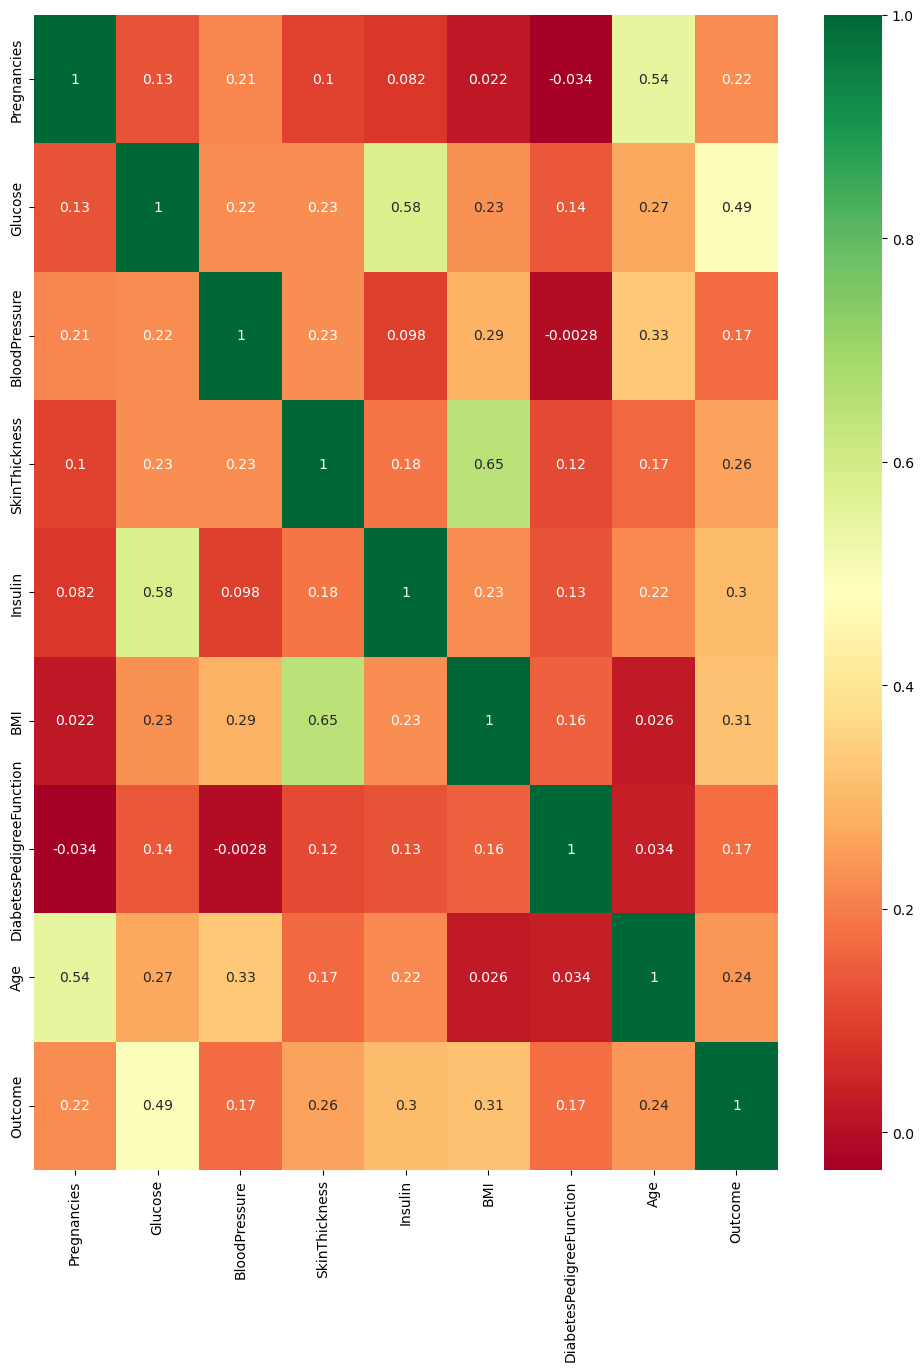

In [15]:
#Heat map for unclean data
plt.figure(figsize=(12,15))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

## The heatmap shows that there is a strong positive correlation between the variables "Glucose" and "Outcome," as well as between the variables "Age" and "Pregnancies." "There is a correlation between a positive and a negative correlation". In contrast, there is a weak negative correlation between "BloodPressure" and "Age", as well as between "Pregnancies" and "BloodPressure".

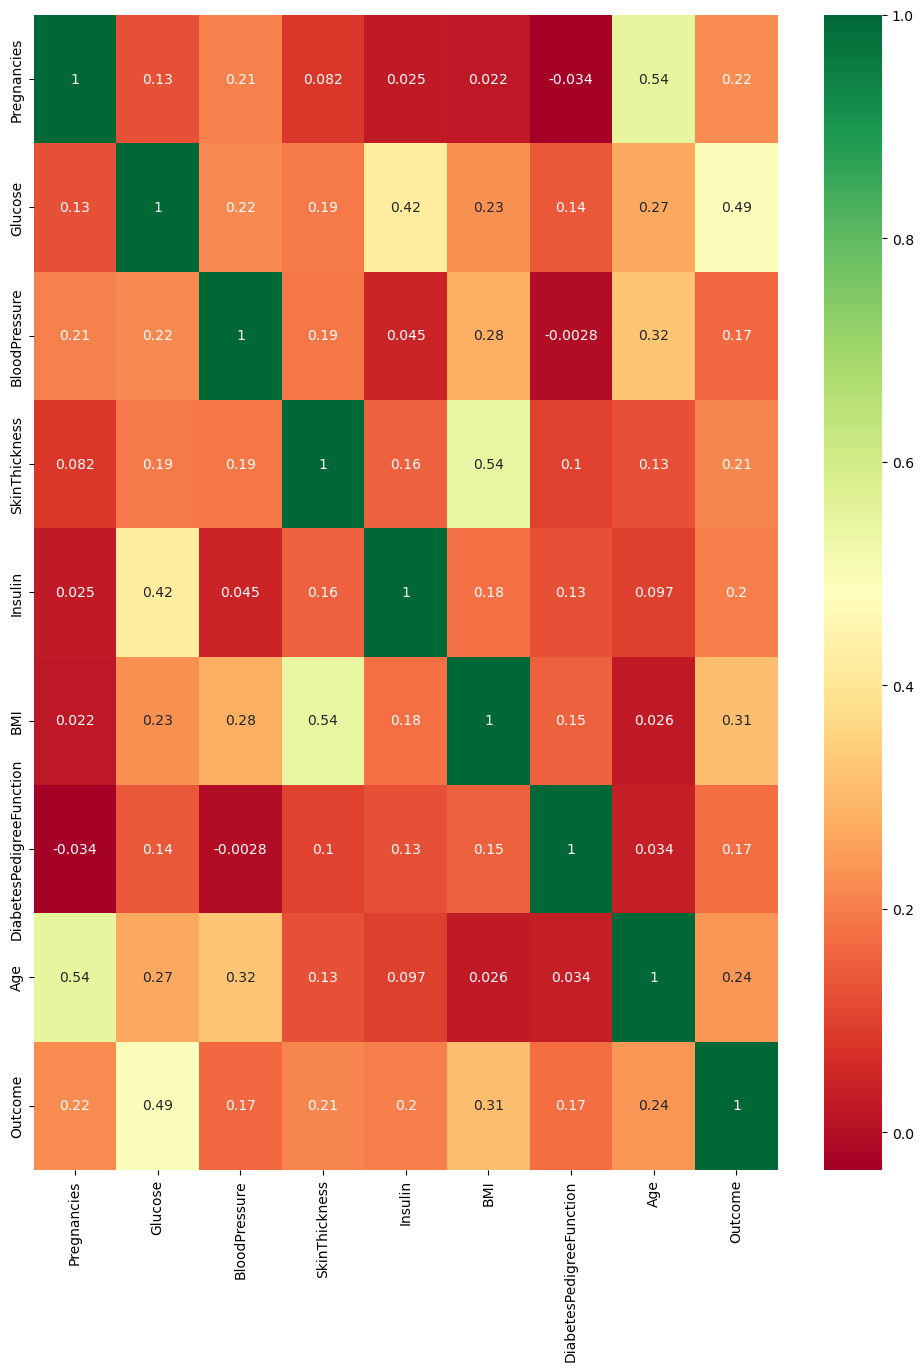

In [16]:
plt.figure(figsize=(12,15))  
p=sns.heatmap(df_data.corr(), annot=True,cmap ='RdYlGn') 

### There appear to be several variables in this heatmap that are highly correlated with one another. For example, there is a strong positive correlation between 'Age' and 'BloodPressure,' as well as between 'Glucose' and 'BMI. In contrast, some variables, such as 'Pregnancies' and 'DiabetesPedigreeFunction,' are negatively correlated with one another.

# Scale the data and mention which scaling technique used

## Because KNN is a distance-based algorithm that uses the distance metric to identify the k nearest neighbors, scaling is crucial. As a result, features with larger magnitudes may predominate in the calculation of the distance metric and features with smaller magnitudes may be ignored. Distance-based algorithms are sensitive to the scale of the input features.

In [17]:
from sklearn.preprocessing import StandardScaler
ssc_X = StandardScaler()
X =  pd.DataFrame(ssc_X.fit_transform(df_data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


## The StandardScaler from the scikit-learn library is used in the code to scale the features. 
## As a standard normalization method used in machine learning, the StandardScaler scales the features to have zero mean and unit variance.
## Scaling is important in KNN because it is a distance-based algorithm that uses the distance metric to find the k nearest neighbors. Distance-based algorithms are sensitive to the scale of the input features, which means that features with larger magnitudes can dominate the calculation of the distance metric, and features with smaller magnitudes can be ignored. Scaling ensures that all features contribute equally to the distance metric and prevents the calculation from being dominated by features with larger magnitudes.

In [18]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [19]:
#X = df_data.drop("Outcome",axis = 1)
y = df_data.Outcome

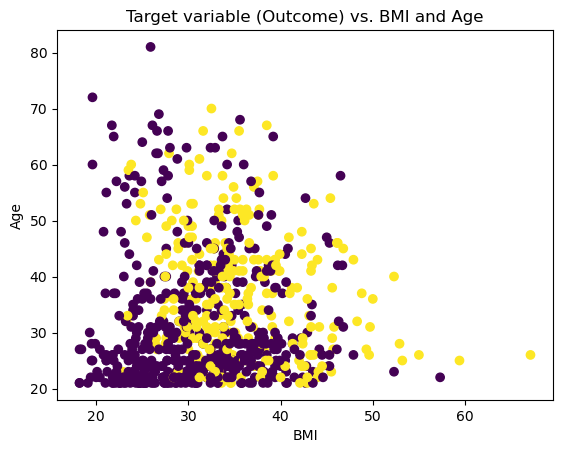

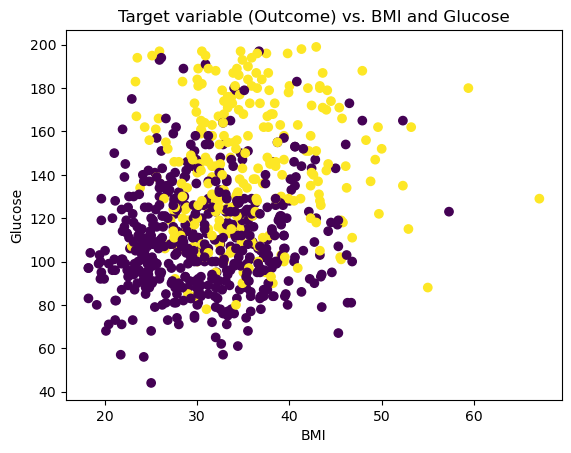

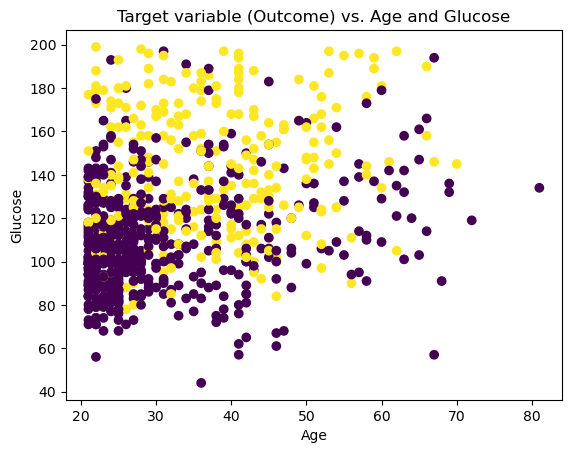

In [37]:

# Select the three most significant attributes
attributes = ['BMI', 'Age', 'Glucose']

# Create a scatter plot for each pair of attributes
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        plt.figure()
        plt.scatter(df[attributes[i]], df[attributes[j]], c=df['Outcome'])
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.title('Target variable (Outcome) vs. {} and {}'.format(attributes[i], attributes[j]))

plt.show()


### 'BMI' and 'Age' scatter plot shows that there is a negative correlation between Age and BMI.
### 'BMI' and 'Glucose' scatter plot shows that there is a distorted correlation between BMI and Glucose.
### 'Age' and 'Glucose' scatter plot shows that there is a positive correlation between Age and Glucose.

# Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier.


## Used the elbow method to find the best K value

In [20]:
# Training Data for 75% and 25% for Testing Data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scores_test = []
scores_train = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    scores_train.append(knn.score(X_train,y_train))
    scores_test.append(knn.score(X_test,y_test))

/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [21]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(scores_train)
scores_train_ind = [i for i, v in enumerate(scores_train) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, scores_train_ind))))

Max train score 100.0 % and k = [1]


In [22]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(scores_test)
scores_test_ind = [i for i, v in enumerate(scores_test) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, scores_test_ind))))

Max test score 73.95833333333334 % and k = [7, 9]


/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


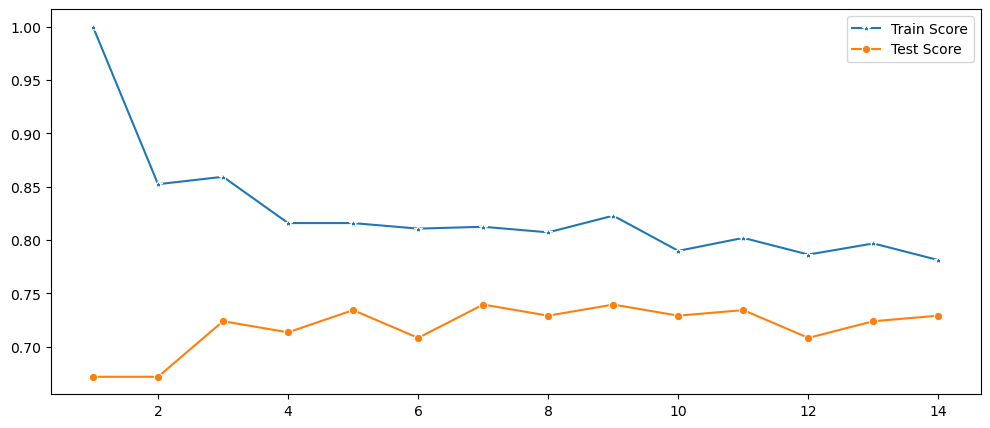

In [23]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),scores_train,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),scores_test,marker='o',label='Test Score')

In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(9)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)


/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7395833333333334

In [25]:
from sklearn.model_selection import cross_val_score, KFold

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(knn, X, y, cv=k_fold)

# Compute the average accuracy
accuracy = np.mean(scores)

print("Cross-validation accuracy:", accuracy)


Cross-validation accuracy: 0.7330871742636449


/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

# Use Euclidean distance

In [26]:
#Eucliedian Distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the KNN model with k=5 and the Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6875


/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Select three best attributes 

In [27]:
#Select 3 best attributes with k = 9
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Use SelectKBest to select the 3 best attributes
select_best_k = SelectKBest(f_classif, k=3)
select_best_k.fit(X_train, y_train)
X_train_new = select_best_k.transform(X_train)
X_test_new = select_best_k.transform(X_test)

# Create the KNN model with k=5 and train it on the selected attributes
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_new, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test_new)

# Get the indices of the selected features
feature_ind = select_best_k.get_support(indices=True)

# Get the names of the selected features
feature_name = X.columns[feature_ind]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the names of the selected features
print("Selected features:", feature_name)
print("Accuracy:", accuracy)


Selected features: Index(['Glucose', 'SkinThickness', 'BMI'], dtype='object')
Accuracy: 0.734375


/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 'Glucose' because glucose is one of the most important parameters in the dataset and also in the body of a human. Also, the dataset for glucose changes drastically hence it is an important parameter.

### 'BMI' because it is directly related to the age of the person. Hence, BMI is also an important parameter when looked at because it changes with age.

### 'Age' because as the person gets older, all the other datasets also change. Hence, age is one of the most important attribute.

### Apart from these three, the other 3 attributes can be 'Skin Thickness', 'Insulin' and 'Pregnancies'


# Plot the ROC curve for best K value

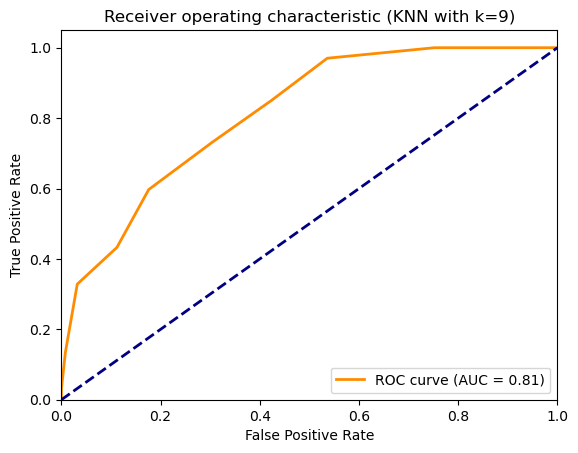

In [29]:
#ROC Curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the KNN model with k=9
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate and true positive rate for the ROC curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve
roc_auc = auc(false_pos_rate, true_pos_rate)

# Plot the ROC curve
plt.figure()
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (KNN with k=9)')
plt.legend(loc="lower right")
plt.show()


In [30]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted,0,1,All
True,,,
0,103,22,125
1,27,40,67
All,130,62,192


/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 23.52222222222222, 'Predicted label')

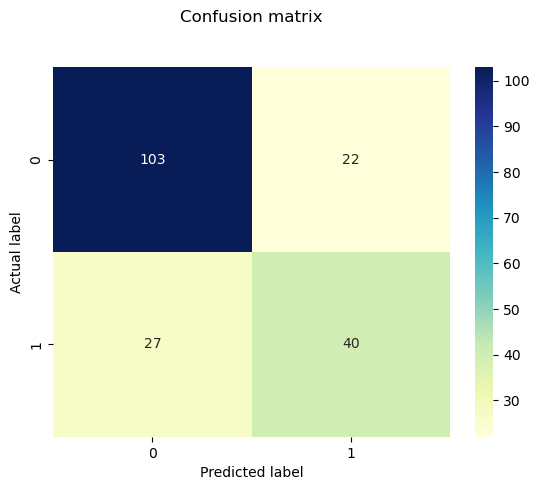

In [31]:
y_pred = knn.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
#Classification Report
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       125
           1       0.65      0.60      0.62        67

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



# Test the classifier with three different k values for neighbors and record the result

## Classification Report is also done below

In [33]:
#Calculate afrom sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the KNN models with different values of k
k_values = [9, 11, 12]
knn_models = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Train each model on the training set and make predictions on the testing set
for i, knn in enumerate(knn_models):
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate and print the classification report for the current model
    print("Classification report for KNN with k=%d:" % k_values[i])
    print(classification_report(y_test, y_pred))


Classification report for KNN with k=9:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       116
           1       0.77      0.58      0.66        76

    accuracy                           0.77       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192

Classification report for KNN with k=11:
              precision    recall  f1-score   support

           0       0.76      0.91      0.82       116
           1       0.79      0.55      0.65        76

    accuracy                           0.77       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192

Classification report for KNN with k=12:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       116
           1       0.80      0.51      0.62        76

    accuracy                           0.76       192
   mac

/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/kartikkataria/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

Text(0, 0.5, 'Error Rate')

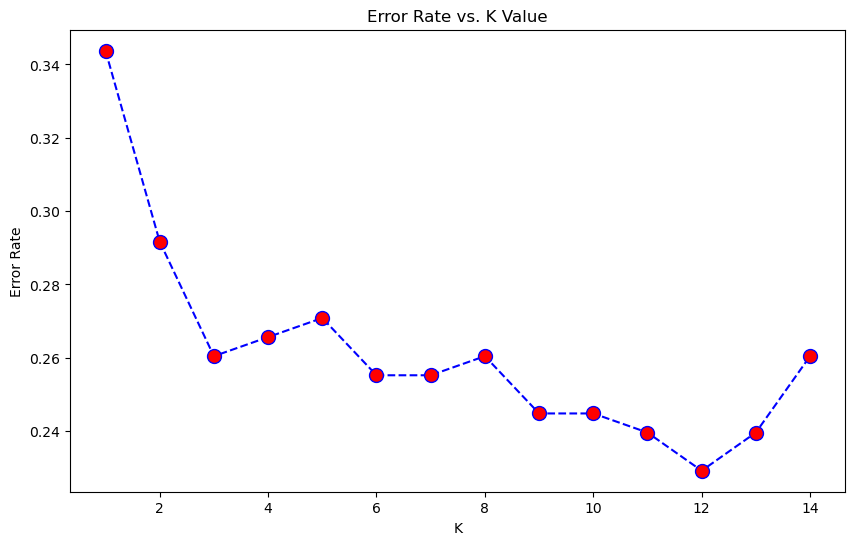

In [35]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

err_rate = []
# Will take some time
for i in range(1,15):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 err_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),err_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Team contribution

Kartik Kataria : Worked on the Nearest Neighbor classifier part of the assignment

Pasam Venkata Sravanthi : Focused on the Decision Tree classifier

Suraj Pawar Vadeghar : Dealt with Naive Bayes classifier in the assignment.